# RNN(Recurrent Neural Network)

RNNは時系列データを予測するのに長けたAIモデルです。  
時系列データとは時刻とともに変化するデータです。

例えば：1月 ~ 12月の月別平均気温、株価の変動、自然言語

## なぜRNNは普通のニューラルネットワーク(単なる全結合ニューラルネットワーク)よりも時系列データの予測に強いのか？
全結合ニューラルネットワークとは、前の層のあるニューロンの出力が重み付きで次の層のすべてのニューロンの入力に使用されるニューラルネットワークです。
下記のようによくご覧になる方もいるであろういろんな玉(ニューロン)が線で結合したニューラルネットワークです。

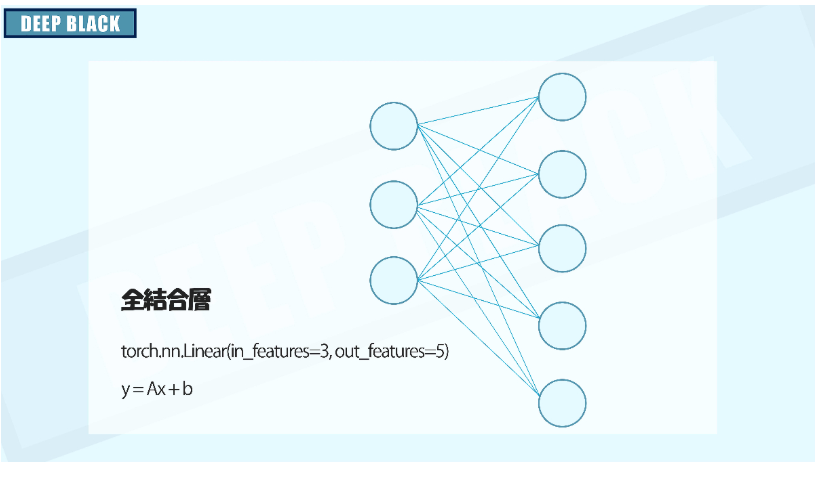  
参照：https://zenn.dev/deepblackinc/books/0e7cc271ca3621/viewer/a60f19

## なぜ全結合ニューラルネットワークでは時系列データの予測が難しいのか？
時系列データはある時点のデータを予測するときに、往々にしてそれまでの時刻の状態を加味する必要があるからです。

例えば、「今日はいい〇△だ」。という文があったとする。〇△に入る文字は「天気」とする。
この〇△を全結合ニューラルで予測しようとするとどうなるのか？

正解は〇△の前にある「今日はいい」という文字を考慮せずただ、〇△に何が入るのかを予測する。  
本来であれば、
なぜなら、全結合ニューラルネットワークでは、ただ入ってきたデータを$y = x \cdot W + b$と計算するのみで、ある時刻での状態を管理する構造を持たないから。

本来であれば、◯△は以下のように予測すべきである。  
$ P(w_1, w_2, ... w_m) = \prod_{i = 1}^n P(w_m | w_1, w_2 .. w_{k-1})$

## RNNはどのように時系列データを予測するのか？
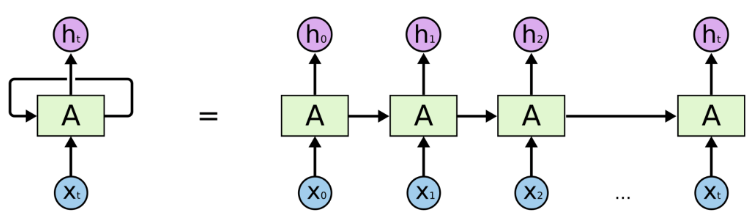  

参照：[自然言語処理で一躍脚光を浴びたRNNとは？初心者に優しく解説！](https://aismiley.co.jp/ai_news/rnn/)

RNNは状態hを使用し予測を行う。  
状態hとは、時刻tにおいてRNNレイヤーで出力した値のことである。  
RNNはこのhを再帰的にRNNレイヤーに入力値として利用する。  
状態hには時刻tまでの情報が詰め込まれている。  
例えば、「今日はいい〇△だ」という文の◯を予測する際に、それ以前の「今日はいい」という情報を持ったhを入力値をして使用することで時間を考慮した予測が可能となる。

以下は状態hを計算する式
$$
h_{t} = tanh(X \cdot W_x + h_{t-1} \cdot W_h + b)
$$

## RNNの計算グラフ

## 複数時刻を一度に処理するTimeRNNグラフ

## RNN用のミニバッチ学習用のデータをどう作るのか？
1. 時系列順にデータを並べる
2. 各バッチでデータを取得する開始位置をずらす

例えば： 1 ~ 1000までの数字が並んだデータがあるとする。  
これをバッチサイズ2, 一度に扱う時刻T = 10でミニバッチ化するには、  
ミニバッチデータ1行目のデータを1 ~ 10, ミニバッチ2行目のデータを500 ~ 510とする。

## RNNにおける課題
1. 勾配消失が発生しやすい
2. 勾配爆発が発生しやすい

### 勾配消失が発生する理由
そもそも勾配、勾配消失とは？  
勾配はモデルの重みを調整する際に使用する値。各重みが、わずかに動くと損失関数にどれくらい影響を与えるのかを計算したものをベクトル化したもの

勾配消失は、逆伝搬時に勾配が小さくなりすぎることで重みが更新されなくなる現象

なぜRNNでは勾配消失が起きやすいのか？  
それは、以下の理由が挙げられます。

1. 活性化関数tanhの微分式の出力の範囲が(0 <= y <= 1)
2. 逆伝搬時の行列の積で同じ重みがかけられる。重みが小さい時、複数回その重みをかけることで勾配が小さくなる
